In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
#source_id, ra, dec, parallax,phot_g_mean_mag, radial_velocity, radial_velocity_error, pm



In [71]:
query = """
SELECT TOP 40000
source_id, ra, dec, parallax,phot_g_mean_mag, radial_velocity, radial_velocity_error, pm
From gaiadr3.gaia_source as g
WHERE radial_velocity < 1200
ORDER BY radial_velocity DESC
"""

In [72]:
job = Gaia.launch_job_async(query=query)
df = job.get_results().to_pandas()

INFO: Query finished. [astroquery.utils.tap.core]


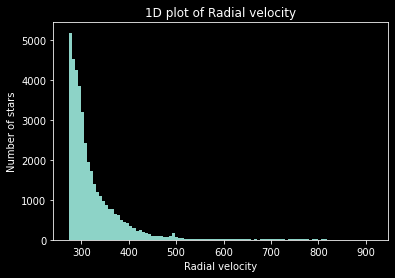

In [73]:
plt.hist(df['radial_velocity'] ,bins=100)
plt.title("1D plot of Radial velocity")
plt.axis()
plt.xlabel("Radial velocity")
plt.ylabel("Number of stars")
plt.show()

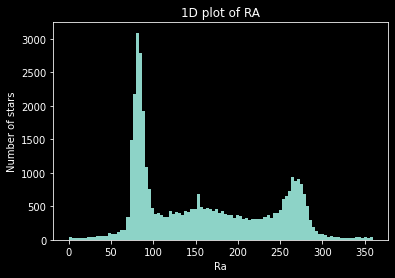

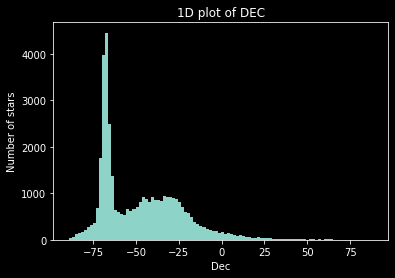

In [74]:
plt.hist(df['ra'] , bins=100)
plt.title("1D plot of RA")
plt.axis()
plt.xlabel("Ra")
plt.ylabel("Number of stars")
plt.show()

plt.hist(df['dec'] , bins=100)
plt.title("1D plot of DEC")
plt.axis()
plt.xlabel("Dec")
plt.ylabel("Number of stars")
plt.show()

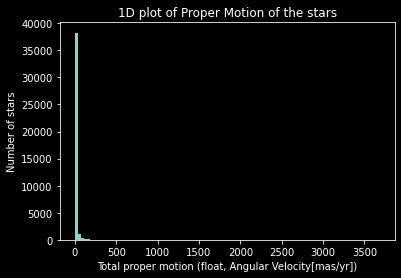

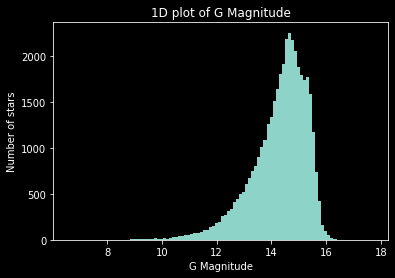

In [75]:
plt.hist(df['pm'], bins=100)
plt.title("1D plot of Proper Motion of the stars")
plt.xlabel("Total proper motion (float, Angular Velocity[mas/yr])")
plt.ylabel("Number of stars")
plt.show()

plt.hist(df['phot_g_mean_mag'] , bins=100)
plt.title("1D plot of G Magnitude")
plt.axis()
plt.xlabel("G Magnitude")
plt.ylabel("Number of stars")
plt.show()



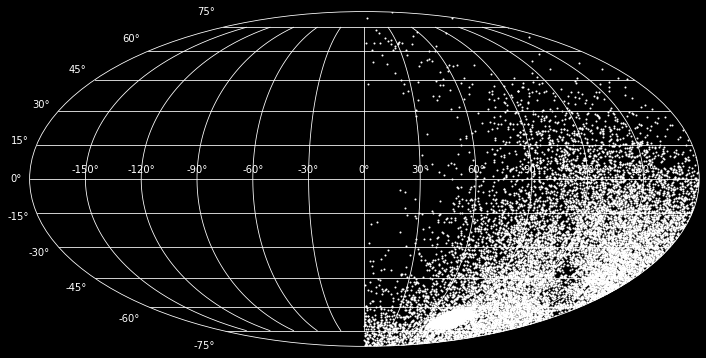

In [77]:
import math
pi = math.pi
from astropy.coordinates import SkyCoord
import astropy.units as u

# ra = np.array(df["ra"])
# dec = np.array(df["dec"])
# eq = SkyCoord(ra,dec, unit=u.deg)
# gal = eq.galactic
# plt.subplot(111, projection='aitoff')
# plt.grid(True)
# plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, s=1)

plt.figure(figsize=(12, 8))
plt.style.use('dark_background')
plt.subplot(projection="mollweide")
plt.grid(True)
ra = np.array(df["ra"])
ra = ra * (pi/180)
dec = np.array(df["dec"])
dec = dec * (pi/180)
plt.scatter(ra,dec, color = 'white', s= 1)
plt.show()